<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

**Привет!** 👋

Меня зовут Алексей Манелюк, я буду проверять твой проект. В Яндекс Практикуме принято общаться на "ты", но если некомфортно - скажи и перейдем на "Вы".

Моя цель - подсветить ошибки, поделиться опытом и помочь в освоении анализа данных.

В тетрадке ты увидишь мои комментарии, пожалуйста, не удаляй, не перемещай и не изменяй их. У комментариев могут быть приписки **2**, **3** и так далее, которые соответствуют каждой версии проверки. Напомню, что у тебя **6** попыток для успешной сдачи проекта.

Я буду использовать цветовую разметку:
<p>
<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b>

Так выделены критические замечания. Без их отработки я не смогу принять проект. </div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>  Комментарий ревьюера ⚠️</b>

Так выделены небольшие замечания или полезные советы. Постарайся учесть их.</div>
<p>
<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Так выделены правильные решения.</div>

Предлагаю работать в диалоге: если что-то дорабатываешь или отвечаешь на мой комментарий - пиши об этом. Мне будет удобней, если ты выделишь свои комментарии:
<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

Все это поможет мне быстрее принять твой проект.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

1.1 Импортируем библиотеки:

In [1]:
import pandas as pd#импорт pandas
import matplotlib.pyplot as plt#импорт библиотеки для работы с графиками


1.2 Сохраним датафрейм в переменную и выведем на экран общую информацию и первые 10 строк:

In [2]:
data = pd.read_csv("/datasets/real_estate_data.csv",sep = "\t" )#читаем файл с данными
data.info()#выводим информацию
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>📌 Чтобы вывести данные в таблице в удобном для чтения виде, можно использовать встроенную функцию `display()` вместо `print()`.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">


Здесь исправил `display()` вместо `print()`.</div>


1.3 Выведем на экран гистограммы значений:

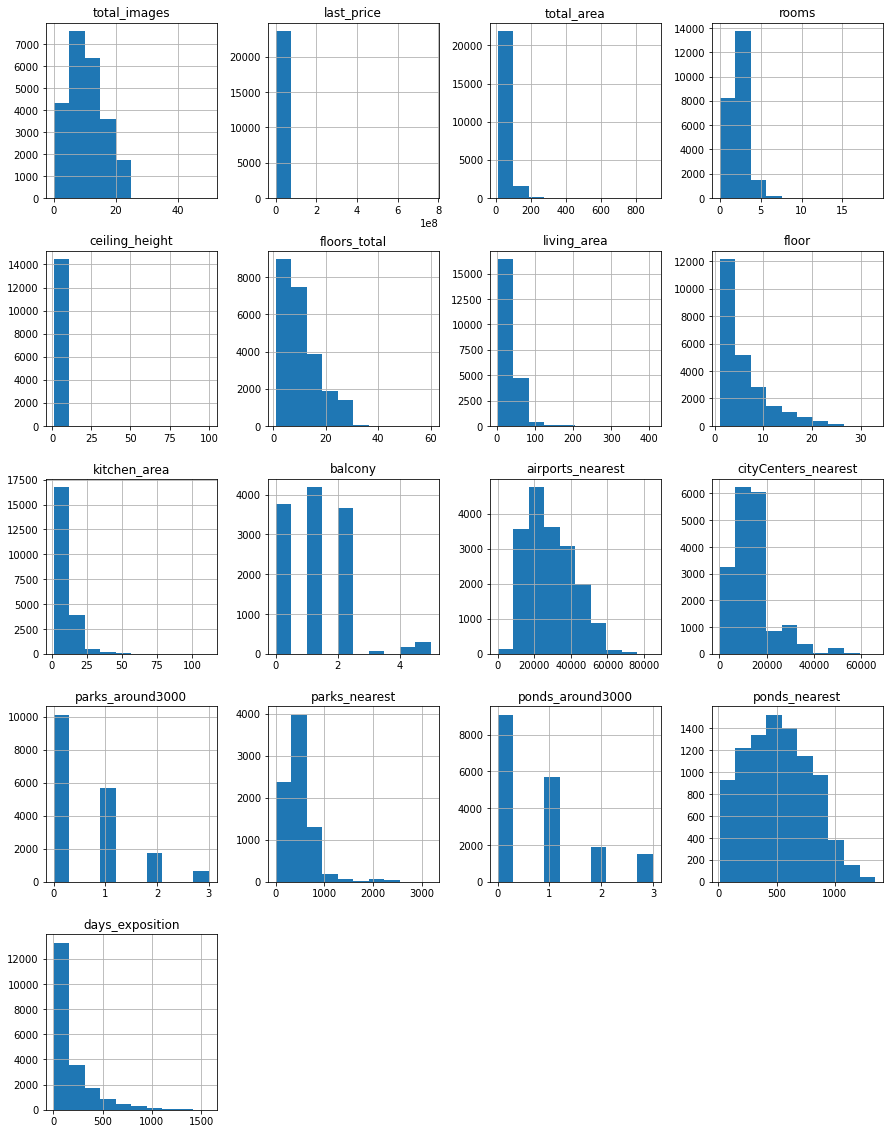

In [3]:
data.hist(figsize=(15, 20));#выводим гистаграммы для каждого столбца

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Чтобы избавиться от этой строки

`array([[<AxesSubplot:title={'center':'total_images'}>`

нужно дописать `plt.show()` или `;` в конце кода для вывода графика.
    
Вывод по первичному знакомству с данными лучше перенести в конец раздела.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">
Здесь дописал `;` в конце кода.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Очень хорошо! 👍</div>

Вывод:Как видно из результатов,в данных имеется большое кол-во пропусков.В частности,это касается данных,заполненных компьютером и некоторых булевых и количественных значений.

### Выполните предобработку данных

2.1 Выведем на экран значение всех явных пропусков по столбцам и далее проведем их детальный анализ:ГОТОВО!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [4]:
def test_type(variable,data_type):#Функция для проверки элементов на пренадлежность к определенному типу данных
    if type(variable) != data_type:
        print(type(variable),variable)
print(data.isna().sum())#выведем весь список явных пропущеных значений
print(data.dtypes)#выведем весь список типов данных по столбцам

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio 

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Вывести типы данных можно методом `dtypes`

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">


Вывел типы данных  методом `dtypes`.</div>

2.2 Изучим столбец "total_images".

In [5]:
print(data["total_images"].unique())#Выведем уникальные значения
for i in data["total_images"]:#Проверим типы данных(значение берется из пункта 1)
    test_type(i,int)

[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]


Вывод: данный столбец является представителем количественных данных .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец не имеет никаких аномалий.

2.3 Изучим столбец "last_price".

In [6]:
print(data["last_price"].unique())#Выведем уникальные значения
for i in data["last_price"]:#Проверим типы данных(значение берется из пункта 1)
    test_type(i,float)   

[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]


Вывод: данный столбец является представителем количественных данных и .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец не имеет никаких пропусков.

2.4 Изучим столбец "total_area".

In [7]:
print(data["total_area"].unique())#Выведем уникальные значения
for i in data["total_area"]:#Проверим типы данных(значение берется из пункта 1)
    test_type(i,float)  

[108.    40.4   56.   ...  66.86 133.81  76.75]


Вывод: данный столбец является представителем количественных данных.Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец не имеет никаких пропусков.

2.5 Изучим столбец "first_day_exposition".

In [8]:
data["first_day_exposition"] = pd.to_datetime(data["first_day_exposition"],format = '%Y-%m-%dT%H:%M:%S')#Преобразуем строку в дату
print(data["first_day_exposition"].unique())#Выведем уникальные значения

['2019-03-07T00:00:00.000000000' '2018-12-04T00:00:00.000000000'
 '2015-08-20T00:00:00.000000000' ... '2014-12-29T00:00:00.000000000'
 '2016-09-12T00:00:00.000000000' '2015-07-19T00:00:00.000000000']


Вывод: данный столбец является представителем данных даты  .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1.1,данный столбец не имеет пропусков.

2.6 Изучим столбец "rooms".

In [9]:
print(data["rooms"].unique())#Выведем уникальные значения
for i in data["rooms"]:#Проверим типы данных(значение берется из пункта 1)
    test_type(i,int)  

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


Вывод: данный столбец является представителем количественных данных и .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец не имеет никаких аномалий.

2.7 Изучим столбец "ceiling_height".

In [10]:
print(data["ceiling_height"].describe())#выведем числовое описание для колонки
data["ceiling_height"] = data["ceiling_height"].fillna(data["ceiling_height"].median())#Замена пропусков медианным значением
print(data["ceiling_height"].unique())#Выведем уникальные значения
for i in data["rooms"]:#Проверим типы данных(значение берется из пункта 1)
    test_type(i,int)  
    


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.   

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

С заменой пропусков на медиану в столбце с высотой потолка.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Здесь лучше использовать гистограмму или рассчитать описательные статистики...

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">


Рассчитана описательная статистика `describe`.</div>

Вывод: столбец "ceiling_height" представляет собой значение высоты потолков в квартире.Данный столбец является представителем количественных данных .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец имеет большое количество пропусков.Можно предположить,что в основном пропуски ставились из соображения,что в квартире высота потолка является "нормальной",то есть типичной для среднестатистического жилья,ибо если в конкретной квартире она была аномальной,то про это точно бы знали и,скорее всего,указали при заполнении.Исходя из этого ,целесообразно заменить пропущенный значения медианным значеним по стоблцу,так как она более устойчива к аномальным числовым значениям.Как видно из результатов,в значениях действительно имеются аномальные числовы значения:1 , 24 ,27 ,32,100 и тд.

2.8 Изучим столбец "floors_total".

In [11]:
data.loc[data["floors_total"].isna(),"floors_total"] = data["floor"]#Заменим пропуски значением на номер этажа из  "floor" 
data["floors_total"] = data["floors_total"].astype("int" , errors = "raise")#Заменим и одновременно проверим тип данных столбца

Вывод: данный столбец является представителем количественных данных и .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец  имеет пропуски.Пропуски могут быть связязаны с тем,что с владельцы живут не на последнем этаже,а значит,если дом многоэтажный ,могут не знать их общее количество.Также причины может быть из-за желания скрыть факт того,что этаж последний,или человек при заполнении анкеты заполнил графу "floor" и в  дальнейшем текстовом описании указал что этаж последний,а саму графу "floors_total" оставил пустой.Как мы знаем из житейского опыта,если есть выбор между первым ,промежуточным и последним этажами ,то люди в большинстве случаев выберут промежуточный.Так как по нормальному распределению вероятности,чаще всего квартиры будут из "промежуточного" сегмента,то есть чаще всего будут продавать квартиры между первым и последнем этажами,а значит объявлений о продаже квартир с первого и последнего этаже будет в разы меньше.
Заменим пропуски значениями этажа квартиры.Также можно заметить,что общее кол-во этажей является float64,а значит нужно преобразовать к типу int64,так как этажи могут быть только целыми числами.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Да, можно так. 👍 Но лучше перед этим проверить немного ли таких пропусков, чтобы не изменилось распределение.

2.9 Изучим столбец "living_area".

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

И еще один момент, постарайся чтобы код с комментариями умещался в одну ячейку по горизонтали без скроллинга, так он будет опрятнее и его будет легче читать и понимать коллегам.

In [12]:
test_living_area = data.query("~living_area.isna()")#Отфильтруем данные без пропусков в значениях площади жилой зоны
living_area_median_value = (test_living_area["living_area"] / test_living_area["total_area"]).median()
data.loc[data["living_area"].isna(),"living_area"] = data["total_area"]*living_area_median_value

Вывод: данный столбец является представителем количественных данных .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец имеет пропуски.Пропуски могут быть связязаны с тем,что :1)Системные ошибки;2)Специфические объявления,например,строящаяся квартира где предварительно может отсутствовать данные об окончательной планировке;3)Написание объявлений без опоры на нормативные документы,например квартира студия,где объективно нет разделения на отдельную кухню и жилую зону,но объявлениядатель может указать площадь кухни,которая может по значениям пересечься с жилой зоной.*********Заполним пропуски значениями,равными произведению общей площади на средний коэффициент отношения площади жилой площади  к общей площади квартиры из строк без пропусков.*********
Проблема возникает в том,что есть квартиры с аномальными значениями,как например с индексом 1992,у которой общая площадь 37.4,жилая 36.4,кухня 8.6,1 балкон.Если общая площадь квартиры включает и балкон тоже,который не является жилой площадью,получаем,что нежилая площадь получается из разницы жилой от общей.То есть,в этом случае,на кухню,ванную,возможные коридоры и балкон уходит 37.4 - 36.4 = 1 м2,а как видно из площади кухни она уже занимает 8.6,то есть даже без ваннной уже уходим в минус.Можно предположить,что 1м2 это площадь балкона,а жилая зона вместе с коридорами,подсобками ,ванной  и  кухней равна 36.4,следовательно,площадь всего,кроме кухни равно 36.4-8.6 =27.8 м2,но тогда мы уже не знаем площадь ванной,коридоров и подсобок,а значит не можем сказать,сколько по площади жилая зона.


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Пропуски в этих 2-х столбцах (living_area и  kitchen_area)можно заполнить без искажения результатов:

Можно посчитать средний коэффициент отношения этих площадей к общей площади квартиры и заполнить пропуски с его помощью.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">


Пропуски в 2-х столбцах (living_area и kitchen_area) заменены согласно рекомендации.Вывод немного изменен (изменения включены с ***************) .</div>

2.10 Изучим столбец "floor".

In [13]:
print(data["floor"].unique())#Выведем уникальные значения
for i in data["floor"]:#Проверим типы данных(значение берется из пункта 1)
    test_type(i,int)

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]


Вывод: данный столбец является представителем категориальных данных .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец не имеет никаких аномалий.

2.11 Изучим столбец "is_apartment".

In [14]:
data["is_apartment"] = data["is_apartment"].fillna(False)#заменим явные пропуски в столбце "is_apartment" на False
print(data["is_apartment"].unique())#Выведем уникальные значения
data["is_apartment"] = data["is_apartment"].astype("bool" , errors = "raise")#Заменим и одновременно проверим тип данных столбца

[False  True]


Вывод: данный столбец является представителем логических данных .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец  имеет большое кол-во пропусков.Апартаменты — это нежилые помещения, которые по условиям близки к жилой недвижимости. В них можно жить, как и в обычных квартирах, но нельзя регистрироваться постоянно.Смею предположить,что огроное количество пропусков стоит из-за того,что владельца объявлений пропускали данный параметр из рассуждений о "нормальности" своей квартиры,то есть,она не являлась апартаментами,так как в подавляющем количестве случаев продают именно обычное жилью,где можно прописаться и которое соответсвует критерию "жилой недвижимости".Исходя из этого ,можно заменить пропуски значеним False.В тоже время ,можно заметить,что данный столбец имеет тип Object.Объективно,квартира может  быть апаратаментами ,либо не быть,то есть,не иметь промежуточных значений,а значит,резонно заменить тип данных object на bool.

2.12 Изучим столбец "studio".

In [15]:
print(data["studio"].unique())#Выведем уникальные значения
for i in data["studio"]:#Проверим типы данных(значение берется из пункта 1)
    test_type(i,bool)

[False  True]


Вывод: данный столбец является представителем логических данных .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец не имеет никаких аномалий.

2.13 Изучим столбец "open_plan".

In [16]:
print(data["open_plan"].unique())#Выведем уникальные значения
for i in data["open_plan"]:#Проверим типы данных(значение берется из пункта 1)
    test_type(i,bool)

[False  True]


Вывод: данный столбец является представителем логических данных .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец не имеет никаких аномалий.

2.14 Изучим столбец "kitchen_area"   

In [17]:
test_kitchen_area = data.query("~kitchen_area.isna()")
kitchen_area_median_value = (test_kitchen_area["kitchen_area"] / test_kitchen_area["total_area"]).median()
data.loc[data["kitchen_area"].isna(),"kitchen_area"] = data["total_area"]*kitchen_area_median_value

Вывод: данный столбец является представителем количественных данных и .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец имеет пропуски.Пропуски могут быть связязаны с тем,что :1)Системные ошибки;2)Специфические объявления,например,строящаяся квартира где предварительно может отсутствовать данные об окончательной планировке;3)Написание объявлений без опоры на нормативные документы,например квартира студия,где объективно нет разделения на отдельную кухню и жилую зону,но объявлениядатель может указать площадь кухни,которая может по значениям пересечься с жилой зоной.*********Заполним пропуски значениями,равными произведению общей площади на средний коэффициент отношения площади кухни  к общей площади квартиры из строк без пропусков.*********

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Пропуски заполняются аналогчино living_area

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">


Пропуски в 2-х столбцах (living_area и kitchen_area) заменены согласно рекомендации.Вывод немного изменен (изменения включены с ********* .</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

 👍</div>

2.15 Изучим столбец "balcony".

In [18]:
data["balcony"] = data["balcony"].fillna(0)#заменим явные пропуски в столбце "balcony" в соответствии с предложенными значениями
print(data["balcony"].unique())#Выведем уникальные значения
data["balcony"] = data["balcony"].astype("int" , errors = "raise")#Заменим и одновременно проверим тип данных столбца

[0. 2. 1. 5. 4. 3.]


Вывод: данный столбец является представителем количественных данных .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец  имеет большое кол-во пропусков.В соответствии с предложенными значениями,пропуски заменены на 0.В тоже время ,можно заметить,что данный столбец имеет тип float64.Объективно,балкон может быть ,либо не быть,то есть,не иметь промежуточных значений,а значит,его количество должно измеряться целыми числами,следовательно,дабы в будущем избежать ошибок,резонно заменить тип данных float64 на int64.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Здесь согласен.

2.16 Изучим столбец "locality_name".

In [19]:
names_dict = {"поселок":"посёлок","городской посёлок":"посёлок","городской поселок":"посёлок","посёлок городского типа":"посёлок","садоводческое некоммерческое товарищество":"садовое товарищество","посёлок имени":"посёлок","посёлок станции":"посёлок","посёлок при железнодорожной станции":"посёлок"}#Создадим список со значениями и их заменами
for j in data["locality_name"]:#Пройдем циклом по всем значениям столбца
    try:
        for old_char,new_char in names_dict.items():
            if old_char in j:
                data["locality_name"] = data["locality_name"].str.replace(old_char,new_char)#Произведем замену соответвующей части на новую,если таковая имеется 
                #print(j,j.replace(old_char,new_char))
    except:
        continue #Если нам попадется значение не str прервет данную итерацию цикла и перейдет к следующей


#Дабы проверить наши замены,создадим словарь,где ключи - это наименования населенных пунктов,а значения - это все возможные виды населенных пунктов для одного конкретного названия

buf = {}
for i in data["locality_name"].unique():
    try:
        i = i.split(" ")#разбиваем полное наименование населенного пункта на отдельные слова 
        for k in range(0,len(i)):
            if i[k][0].isupper():#проверяем первую букву слова на наличие верхнего регистра 
                if " ".join(i[k:]) in buf:#если прошлое условие выполнено,то все слова за первым с заглавной буквой верхнего регистра вновь объединяются в полное нзвание населенного пункта без его типа.Если это наименование имеется в словаре,то:
                    buf[" ".join(i[k:])].append( " ".join(i[:k]) )#добавляем новое значение типа населенного пункта в список значений 
                else:
                    buf[" ".join(i[k:])] = [" ".join(i[:k])]  # если такого пункта еще не было,то создает список с первым значением  вида населенного         
                break

            
    except:
        continue
for i in buf:#сделаем мини-цикл,где проверятся ,может ли у одного названия быть несколько видов населенных пунктов.
    if len(buf[i])>1:
        print("Error!",i,buf[i])
#В типах,где есть пустая строка,это тип "город"

Error! Мурино ['посёлок', '']
Error! Кудрово ['деревня', '']
Error! Фёдоровское ['деревня', 'посёлок']
Error! Никольское ['', 'село']
Error! Павлово ['село', 'посёлок']
Error! Рахья ['посёлок', 'садовое товарищество']
Error! Зимитицы ['посёлок', 'деревня']
Error! Калитино ['деревня', 'посёлок']
Error! Приладожский ['посёлок', 'садовое товарищество']
Error! Щеглово ['посёлок', 'деревня']
Error! Рабитицы ['деревня', 'посёлок']
Error! Гарболово ['деревня', 'посёлок']
Error! Любань ['', 'посёлок']
Error! Лесное ['посёлок', 'коттеджный посёлок']


Вывод:данный столбец является представителем категориальных данных.Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец  имеет пропуски.Можно методом дедукции попытаться определить и заполнить пропуски на основании сторонних факторов ,такие как расстояние до водоемов и парков,их количество,расстояние до аэропорта и центра города ,основываясь на данных других строк где нет пропусков в названии населенного пункта,то есть,например у нас пропуск в строке ,но 400 м до водоема и 1 км до аэропорта и параллельно с этим у нас есть известный населенный пункт с +- такими же параметрами,то логично предположить,что этот пропуск можно заменить на название этого населенного пункта.К сожалению,если ошибка с кол-вом этажей в доме может быть не столь критичной и влиять на итоговые результаты анализа купли/продажи  может по-минимуму,то вот название неправильное название населенного пункта может оказаться критичной ошибкой,как итог пока что резонно оставить пропуски до дальнейших действий.Одновременно с этим,вывев все уникальные значения,можно заметить,что одни и те же населенные пункты могут иметь разные строчные значения из-за разных форм обозначения типа населенного пункта,то есть "посёлок Новый Учхоз" и "посёлок городского типа Новый Учхоз" в строчных значениях не одно и тоже,а в действительности это один и тот же населенный пункт.Для того чтобы в дальнейшем пользоваться наименованиями населенных пунктов без ошибок,произведем некоторые замены.Сразу обмолвимся, в географических понятиях "посёлок" и "посёлок городского типа" может отличаться некоторыми частями инфраструктуры,но дабы избежать путаницы упростим все до просто "посёлок".Также с "посёлок городоского типа" имеются такие наименования как "посёлок при железнодорожной станции" ,что ,по сути,является тем же самым ,но со своими инфраструктурными нюансами."Садовые некомерческие товарищества" заменим на "садовое товарищество".Такие наименования как "село" и "деревня" менять не будем.Также такие наименования как "коттеджный посёлок" мы  менять не будем ,так как ,согласно интернету,коттеджный посёлок не является самостоятельным населённым пунктом и может быть садовым или дачным товариществом без образования посёлка,иметь наименование «коттеджный посёлок», но фактически быть районом существующего населённого пункта.
    При проверке результатов было замечено,что некоторые населенные пункты имеют несколько типов.Это может быть по двум причинам:1)при написании типа населенного пункта была допущена ошибка самим объявлениедателем;2)из-за того ,что существует два отдельных населенных пункта с одним названием,но разными типами,например Павлово  это и  село в Всеволожском районе ,и  посёлок в Кировском районе ,оба в Ленинградской области.Как итог,замена бы проведена для всех разновидностей посёлков в просто "посёлок".

In [20]:
#Код ревьюера
data.loc[data['locality_name'].str.contains('Рябово') & data['locality_name'].notna(), 'locality_name']

1611     посёлок Рябово
3930     посёлок Рябово
6465     посёлок Рябово
11118    посёлок Рябово
Name: locality_name, dtype: object

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Супер, неявные дубликаты обработаны правильно!

2.16 Изучим столбец "airports_nearest".

In [21]:
median_airports_nearest = data.groupby("locality_name")["airports_nearest"].median()#Сгруппируем данные по населенным пунктам
def fill_missing_with_median_airports_nearest(row):#создадим функцию для подставновки значений при соблюдении условий
    if pd.isnull(row["airports_nearest"]):#проверяем условие ,является ли значение расстояния до аэропорта пропуском
        median_value = median_airports_nearest.get(row["locality_name"])#если да,то получаем из строки сгруппированных данных по названию населенного пункта значение медианы
        if pd.notnull(median_value):#если медиана не является пропуском
            return median_value #возвращает это значение 
        else:
            return None#возвращает пропуск(ничего не меняет)
    else:
        return row["airports_nearest"]#если значение из датафрейма не является пропуском,то ничего не делает
    
print(data["airports_nearest"].isna().sum())#Выведем общее кол_во пропусков до преобразования (5542)
data["airports_nearest"] = data.apply(fill_missing_with_median_airports_nearest,axis = 1)
print(data["airports_nearest"].isna().sum())#Проверим(4872).Значит,остальные значения можно заменить медианой по всем непустым значениям.
data["airports_nearest"] = data["airports_nearest"].fillna(data["airports_nearest"].median())
data["airports_nearest"] = data["airports_nearest"].astype("int" , errors = "raise")#Заменим и одновременно проверим тип данных столбца

5542
4872


Вывод:данный столбец является представителем количественных данных.Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец  имеет  большое кол-во пропусков.Пропуски могли возникнуть по нескольким причинам:1)Владелец объявления никогда не летал на самолете и как итог может не знать ближайшее расположение ,или же знать где находится ,но без точных цифр расстояния;2)Большое удаление от дома;3)Ошибки в данных.
Заполним пропуски двумя способами:
1)Проверим,есть ли у нас населённые пункты с пропусками расстояния до аэропорта и в тоже время имеющие какие то значения.Если таковые имеются,то заменим пропуски на медианные значения для населенного пункта;2)Оставшиеся пропуски заменим на медиану всех оставшихся значений.Данные из float64 резонно перевести в int64,потому что расстояние лучше считать целых метрах,а не в дробных.

2.17 Изучим столбец "cityCenters_nearest".

In [22]:
data = data.rename(columns = {"cityCenters_nearest":"city_centers_nearest"})#Переименуем столбец 

median_city_centers_nearest = data.groupby("locality_name")["city_centers_nearest"].median()#Сгруппируем данные по населенным пунктам
def fill_missing_with_median_centers_nearest(row):#создадим функцию для подставновки значений при соблюдении условий
    if pd.isnull(row["city_centers_nearest"]):#проверяем условие ,является ли значение расстояния до центра города пропуском
        median_value = median_city_centers_nearest.get(row["locality_name"])#если да,то получаем из строки сгруппированных данных по названию населенного пункта значение медианы
        if pd.notnull(median_value):#если медиана не является пропуском
            return median_value #возвращает это значение 
        else:
            return None#возвращает пропуск(ничего не меняет)
    else:
        return row["city_centers_nearest"]#если значение из датафрейма не является пропуском,то ничего не делает
    
print(data["city_centers_nearest"].isna().sum())#Выведем общее кол_во пропусков до преобразования (5519)
data["city_centers_nearest"] = data.apply(fill_missing_with_median_centers_nearest,axis = 1)
print(data["city_centers_nearest"].isna().sum())#Проверим(4872).Значит,остальные значения можно заменить медианой по всем непустым значениям без учета Санкт-Петербурга.
data["city_centers_nearest"] = data["city_centers_nearest"].fillna(data.query("locality_name != 'Санкт-Петербург'")["city_centers_nearest"].median())
print(data.query("locality_name != 'Санкт-Петербург'")["city_centers_nearest"].median())

5519
4872
28806.5


Вывод:данный столбец является представителем количественных данных.Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец  имеет  большое кол-во пропусков.Пропуски могли возникнуть по нескольким причинам:1)Сама форма заполнения данных скорее всего не подразумевала людей живущих не в СПБ,ибо для жителей деревни или районных городов значение до центра города может означать расстояние до центра их населенного пункта,а для деревни и посёлка это значение не играет роли ;2)Большое удаление от центра  города и как результат,пустое значение  ;3)Ошибки в данных.
Заполним пропуски двумя способами:
1)Проверим,есть ли у нас населённые пункты с пропусками расстояния до центра города и в тоже время имеющие какие то значения.Если таковые имеются,то заменим пропуски на медианные значения для населенного пункта;2)Оставшиеся пропуски заменим на медиану всех оставшихся значений БЕЗ учета самого города Санкт-Петербург,ибо если посмотреть на общее кол-во объявлений по продажам квартир ,то самое большое значение будут занимать квартиры именно из Санкт-Петербурга,а так как расстояние до его центра будет не столь большим,а иные населенные пункты будут ОПРЕДЕЛЕННО находиться за пределами города,все объявления из Санкт-Петербурга будут смещать медиану в сторону более низких значений.Данные из float64 резонно перевести в int64,потому что расстояние лучше считать целых метрах,а не в дробных.

2.18 Изучим столбцы "parks_around3000" и "parks_nearest".

In [23]:
data = data.rename(columns = {"parks_around3000":"parks_around_3000"})
print(data.query('parks_nearest.isna() and parks_around_3000 > 0 '))#Выведем на экран для наглядности список объявлений ,где есть пропуски в "parks_nearest",а значения в "parks_around3000" >0
#Как видно из результата,таких объявлений нет,а значит все пропуски в "parks_nearest" можно заменить 0
print(data.query('parks_nearest >0  and parks_around_3000.isna() '))#Сделаем аналогичное для "parks_nearest">0
#Как видно из результата,таких объявлений нет,а значит все пропуски в "parks_around_3000" можно заменить 0
print(len(data.query('parks_nearest.isna()  and parks_around_3000.isna() ')))#Выведем на экран для наглядности список объявлений где есть пропуски в "parks_nearest" и в "parks_around3000".
#Как видно из результата,таких объявлений 5518,что соответствует кол-ву пропусков в столбце из пункта 2.1,а значит такие пропуски можно заполнить 0 как в "parks_around_3000",так и в "parks_nearest"
data.loc[(data["parks_nearest"].isna() ) & (data["parks_around_3000"].isna()),["parks_around_3000","parks_nearest"]] = 0
print(data[["parks_nearest","parks_around_3000"]].isna().sum())#Выведем промежуточные результаты замены пропусков
#Как видно из результата,в "parks_around3000" пропусков больше нет,а вот в "parks_nearest" еще 10102 пропуска.Проверим другое условие:сколько строк с пропусками в "parks_nearest" имеют 0 в "parks_around_3000"
print(len(data.query('parks_nearest.isna()  and parks_around_3000 == 0 ')))#Как видно из результата,ровно 10102,а значит,заменим такие пропуски на 0
data.loc[(data["parks_nearest"].isna() ) & (data["parks_around_3000"] ==0),"parks_nearest"] = 0
print(data[["parks_nearest","parks_around_3000"]].isna().sum())#Проверим данные еще раз.Результаты говорят,что пропусков не осталось.
#Можно заметить в пункте 1 ,что столбцы "parks_around_3000" и "parks_nearest" имеют тип данных float64.Кол-во парков может быть только целое(int) ,а расстояние до парка в метра целесообразние также хранить в int.Переведем оба столбца в тип int
data["parks_nearest"] = data["parks_nearest"].astype("int" , errors = "raise")#Заменим и одновременно проверим тип данных столбца
data["parks_around_3000"] = data["parks_around_3000"].astype("int" , errors = "raise")#Заменим и одновременно проверим тип данных столбца

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
5518
parks_nearest        10102
parks_around_3000        0
dtype: int64
10102
parks_nearest        0
parks_around_3000    0
dtype: int64


Вывод:данные столбцы являются представителями количественных данных.Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбецы  имеет  большое кол-во пропусков.Пропуски могли возникнуть по нескольким причинам:1)В радиусе 3 км нет парков и как итог человек мог это просто не отметить;2)Незнание того,имеются ли парки в радиусе 3 км;3)Системные ошибки.В датафрейме есть такой показатель как "parks_nearest" обозначающий расстояние до ближайшего парка в метрах.
    Для возможных замен данных пропусков нужно знать сразу 3 столбца:"locality_name"(название населенного пункта),"parks_nearest"(расстояние до ближайшего парка),"parks_around3000"(кол-во парков в радиусе 3 км).Рассмотрим разные возможные случаи:
    1)Если в объявлении есть пропуски в столбце "parks_around3000" ,но есть собственные значения в столбце "parks_nearest",то такие пропуски можно заменить на 1.
    2)Если в объявлении есть пропуски в столбце "parks_nearest" ,но есть собственные значения в столбце "parks_around3000",то такие пропуски можно заменить на 3000 м.
    3)Если в объявлении есть пропуски в столбце "parks_nearest" и в столбце "parks_around3000",то такие пропуски можно заменить на 0.
    Стоит сразу оговорить,что в "locality_name" есть названия разных населенных пунктов,которые можно группировать.Если в группе,скажем,Колпино,у одних объявлений  есть пропуски в столбце "parks_around3000" ,а  у других есть значения,заменить пропуски медианным значением имеющихся данных по населенному пункту может привести к ошибка в последующем анализе,потому что населенный пункт может быть больше 3 км,а значит, если парк будет стоять с самого края,далеко не все объявления могут быть в радиусе 3 км от него,а значит,таким образом мы внесем ложную информацию.Оба столбца приведем к типу int64,потому что расстояние метров лучше измерять в целых значениях,а кол-во парков может быть только целым.


2.19 Изучим столбцы "ponds_around3000" и "ponds_nearest".

In [24]:
data = data.rename(columns = {"ponds_around3000":"ponds_around_3000"})
print(data.query('ponds_nearest.isna() and ponds_around_3000 > 0 '))#Выведем на экран для наглядности список объявлений ,где есть пропуски в "ponds_nearest",а значения в "ponds_around_3000" >0
#Как видно из результата,таких объявлений нет,а значит все пропуски в "ponds_nearest" можно заменить 0
print(data.query('ponds_nearest >0  and ponds_around_3000.isna() '))#Сделаем аналогичное для "ponds_nearest">0
#Как видно из результата,таких объявлений нет,а значит все пропуски в "ponds_around3000" можно заменить 0
print(len(data.query('ponds_nearest.isna()  and ponds_around_3000.isna() ')))#Выведем на экран для наглядности список объявлений где есть пропуски в "ponds_nearest" и в "ponds_around_3000".
#Как видно из результата,таких объявлений 5518,что соответствует кол-ву пропусков в столбце из пункта 2.1,а значит такие пропуски можно заполнить 0 как в "ponds_around_3000",так и в "ponds_nearest"
data.loc[(data["ponds_nearest"].isna() ) & (data["ponds_around_3000"].isna()),["ponds_around_3000","ponds_nearest"]] = 0
print(data[["ponds_nearest","ponds_around_3000"]].isna().sum())#Выведем промежуточные результаты замены пропусков
#Как видно из результата,в "ponds_around_3000" пропусков больше нет,а вот в "ponds_nearest" еще 9071 пропуска.Проверим другое условие:сколько строк с пропусками в "ponds_nearest" имеют 0 в "ponds_around3000"
print(len(data.query('ponds_nearest.isna()  and ponds_around_3000 == 0 ')))#Как видно из результата,ровно 9071,а значит,заменим такие пропуски на 0
data.loc[(data["ponds_nearest"].isna() ) & (data["ponds_around_3000"] ==0),"ponds_nearest"] = 0
print(data[["ponds_nearest","ponds_around_3000"]].isna().sum())#Проверим данные еще раз.Результаты говорят,что пропусков не осталось.
#Можно заметить в пункте 1 ,что столбцы "ponds_around_3000" и "ponds_nearest" имеют тип данных float64.Кол-во водоёмов может быть только целое(int) ,а расстояние до водоёма в метра целесообразние также хранить в int.Переведем оба столбца в тип int
data["ponds_nearest"] = data["ponds_nearest"].astype("int" , errors = "raise")#Заменим и одновременно проверим тип данных столбца
data["ponds_around_3000"] = data["ponds_around_3000"].astype("int" , errors = "raise")#Заменим и одновременно проверим тип данных столбца

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]
5518
ponds_nearest        9071
ponds_around_3000       0
dtype: int64
9071
ponds_nearest        0
ponds_around_3000    0
dtype: int64


Вывод:данный столбец является представителем количественных данных.Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец  имеет  большое кол-во пропусков.Пропуски могли возникнуть по нескольким причинам:1)В радиусе 3 км нет водоёмов и как итог человек мог это просто не отметить;2)Незнание того,имеются ли водоёмы в радиусе 3 км;3)Системные ошибки.В датафрейме есть такой показатель как "ponds_nearest" обозначающий расстояние до ближайшего водоёма в метрах.
    Для возможных замен данных пропусков нужно знать сразу 3 столбца:"locality_name"(название населенного пункта),"ponds_nearest"(расстояние до ближайшего водоёма),"ponds_around_3000"(кол-во водоёмов в радиусе 3 км).Рассмотрим разные возможные случаи:
    1)Если в объявлении есть пропуски в столбце "ponds_around_3000" ,но есть собственные значения в столбце "ponds_nearest",то такие пропуски можно заменить на 1.
    2)Если в объявлении есть пропуски в столбце "ponds_nearest" ,но есть собственные значения в столбце "ponds_around_3000",то такие пропуски можно заменить на 3000 м.
    3)Если в объявлении есть пропуски в столбце "ponds_nearest" и в столбце "ponds_around_3000",то такие пропуски можно заменить на 0.
    Стоит сразу оговорить,что в "locality_name" есть названия разных населенных пунктов,которые можно группировать.Если в группе,скажем,Колпино,у одних объявлений  есть пропуски в столбце "ponds_around3000" ,а  у других есть значения,заменить пропуски медианным значением имеющихся данных по населенному пункту может привести к ошибка в последующем анализе,потому что населенный пункт может быть больше 3 км,а значит, если парк будет стоять с самого края,далеко не все объявления могут быть в радиусе 3 км от него,а значит,таким образом мы внесем ложную информацию.Оба столбца приведем к типу int64,потому что расстояние метров лучше измерять в целых значениях,а кол-во водоёмов может быть только целым.
    
    
    

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Большая работа, но по большому счету, в эти столбцы должны были подтягиваться данные из геолокации, но что-то пошло не так и образовались пропуски. Точно такие данные восстановить сложно, можно оставить как есть, тем более что в дальнейшем анализе они роли не играют.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Комментарии и выводы в ячейках Markdown стоит разделить на абзацы для легкости чтения. Также, можно выделить **самые важные моменты** и структурировать текст с помощью форматирования.

Вот [ссылочка](https://konvut.github.io/k50articles/), которая поможет отформатировать текст в ячейке Markdown


2.20 Изучим столбец "days_exposition".

In [25]:
buffer = data.dropna(subset = ["days_exposition"]).reset_index(drop = True)#Создадим буферный датафрей из оригинального без пропусков
buffer["days_exposition"] = buffer["days_exposition"].astype("int" , errors = "raise")#Конвертируем данные из float64 в int64
arg = (buffer["first_day_exposition"] + pd.to_timedelta(buffer["days_exposition"],unit = "d")).max()#Найдем максимальное значение даты
data.loc[data["days_exposition"].isna(),"days_exposition"] = (arg - data["first_day_exposition"]).dt.days#Посчитаем ,конвертируем из timedelat в int и  вставим кол-во дней на места пропусков
data["days_exposition"] = data["days_exposition"].astype("int" , errors = "raise")#Заменим и одновременно проверим тип данных столбца

Вывод: данный столбец является представителем количественных данных и .Как видно из результатов или общего количества пропусков из пункта 2.1 и типа данных пункта 1,данный столбец имеет большое кол-во пропусков.Можно предположить,что большая часть пропусков данного столбца возникла из-за того,что объявления с пропусками на момент формирования архива не были закрыты,то есть квартиру никто не купил.Также один из вариантов,что объявление о квартире может быть выложено в день формирования архива.Помимо этого,как и во всех иных столбцах пропуски могли возникнуть из-за системых ошибок.Если бы у нас была дата формирования архива  можно было бы от нее  отнять значения даты публикации объявления. Так как у нас ее нет,найдем максимальное значение  ,сложив каждую дату публикации с соответвующим количеством дней до покупки.Данный столбец объективно перевести к типу int64,потому что для рассмотрения и анализа покупок более практично использовать целые числа.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Здесь ты прав, что пропуски из-за того, что объявление не было закрыто на момент выгрузки. Поэтому заполнять их расчетными значениями нет смысла, лучше оперировать исходными данными.


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>В конце предобработки имеет смысл написать краткий промежуточный вывод: что сделано, все ли пропуски обработаны, типы данных приведены к нужным, сравнить первоначальную таблицу с обработанной на предмет того, сколько данных было удалено (если что-то удалялось). </div>

Вывод:в ходе предобработки были заполнены там,где это возможно,пропуски,например,в столбцах "ceiling_height" медианным значением высоты,"kitchen_area" и "living_area" заполнены на основании усредненного коэффициента отношения жилой или кухонной площади к общей площади в строках без пропусков,в столбце "locality_name" строчные названия насёленных пуктов приведены к единому стандарту,в таких булевых значения,как "is_apartment" и "open_plan" ,пропуски заменены на False,так как они являются нестандартными для среднестатистических объявлений по продажам,в иных столбцам пропуски остаются ситуативными и их можно как заменить медианными значениями,так и не заменять вовсе.Также в некоторых столбцах был изменены типы данных,например,столбец "first_day_exposition" на тип данных "дата","balcony" на "int" вместо "float",так как балкон может либо быть,либо не быть,0.5 быть не может.

### Добавьте в таблицу новые столбцы

3.1 Создадим столбец со значениями цены одного квадратного метра: 

In [26]:
data["square_meter_price"] = (data["last_price"]/data["total_area"]).round(2)#Создадим столбец и округлим его до 2 знаков после запятой

3.2 Создадим столбец со значениями дня недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [27]:
data["day_of_publication"] = data["first_day_exposition"].dt.weekday#Создадим столбец 

3.3 Создадим столбец со значениями месяца публикации объявления:

In [28]:
data["month_of_publication"] = pd.DatetimeIndex(data["first_day_exposition"]).month

3.4 Создадим столбец со значениями года публикации объявления:

In [29]:
data["year_of_publication"] = pd.DatetimeIndex(data["first_day_exposition"]).year

3.5 Создадим столбец со значениями типа этажа квартиры (значения — «первый», «последний», «другой»):

In [30]:
def floor_type_convertation(row):#Создадим функцию для классификации этажей квартир
    floor = row["floor"]
    floors_total = row["floors_total"]
    if floor == 1:
        return "первый"
    elif floor == floors_total:
        return "последний"
    return "другой"
data["floor_type"] = data.apply(floor_type_convertation ,axis = 1)#Применим функцию к датафрейму
print()

3.6 Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений). 

In [31]:
data["city_centers_nearest_km"] = (data["city_centers_nearest"]/1000).round(0)
data["city_centers_nearest_km"] = data["city_centers_nearest_km"].astype("int" , errors = "raise")

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Хорошо бы после добавления столбцов вывести несколько строк обновленного датафрейма, а также закончить шаг кратким выводом.</div>

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">


Выведены на экран первые 10 строк обновленного датафрейма.</div>

3.6 Выведем на экран первые 10 строк обновленного датафрейма:

In [32]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,day_of_publication,month_of_publication,year_of_publication,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482,2,755,56,120370.37,3,3,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,0,0,0,81,82920.79,1,12,2018,первый,19
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,90,2,574,558,92785.71,3,8,2015,другой,14
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.289724,9,False,...,84,3,234,424,408176.10,4,7,2015,другой,7
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,112,1,48,121,100000.00,1,6,2018,другой,8
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,0,0,0,55,95065.79,0,9,2018,другой,29
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,0,0,0,155,99195.71,3,11,2017,другой,19
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.658769,22,False,...,0,0,0,14,110544.69,3,4,2019,другой,12
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,0,0,0,189,87454.76,2,5,2018,другой,22
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0,0,0,289,88524.59,6,2,2017,другой,15


Вывод:в датафрейм были добавлены новые столбцы,значения которых в той или иной степени могли зависить от пропусков,которые были обработаны в преобработке данных.Как видно из значений,данные столбцы служат для более простого использования исходных и их классификации.

### Проведите исследовательский анализ данных

4.1 Изучим перечисленные ниже параметры объектов и построим гистрограммы:
    -общая площадь;
    -жилая площадь;
    -площадь кухни;
    -цена объекта;
    -количество комнат;
    -высота потолков;
    -тип этажа квартиры («первый», «последний», «другой»);
    -общее количество этажей в доме;
    -расстояние до центра города в метрах;
    -расстояние до ближайшего парка.
 

4.1.1 Общая площадь:

0
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


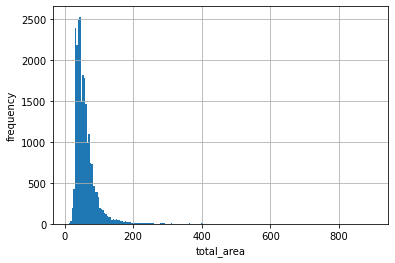

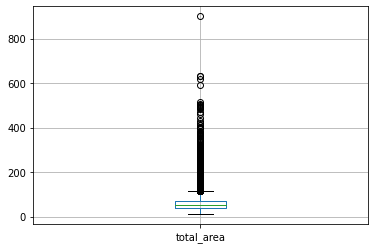

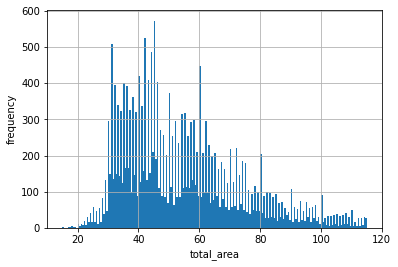

count    22476.000000
mean        54.437962
std         19.462897
min         15.000000
25%         39.400000
50%         50.200000
75%         65.700000
max        115.000000
Name: total_area, dtype: float64


In [33]:
print(data.duplicated().sum())#Проверим датафрейм на явные дубликаты
print(data["total_area"].describe())#выведем описательную статистику исходного датафрейма
data["total_area"].hist(bins = 200 )#построим гистограмму 
plt.xlabel("total_area")
plt.ylabel("frequency")
plt.show()

data.boxplot("total_area");
plt.ylim()
plt.show()


#Как видно из результатов,основная часть всех объявлений находится в районе  от 11 до 110 м2.Для наглядного анализа,обрежем значения дальше этих значений.

total_area_data = data.query("total_area>=15 and total_area<=115")
total_area_data["total_area"].hist(bins = 200 )#построим гистограмму для 
plt.xlabel("total_area")
plt.ylabel("frequency")
plt.show()
print(total_area_data["total_area"].describe())#выведем описательную статистику нового датафрейма

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

Каждый график в проекте стоит оформить правильно:

- добавить название
- подписать оси X и Y

Также, проверь пожалуйста, чтобы каждый график в проекте был прокомментирован хотя бы кратко. Без пояснений не всегда понятно для чего та или иная визуализация.

Вывод:как видно из результатов,основные пики значений приподают на квартиры стандартной площади,которые определяются самыми популярными типами домов.В основном,это квартиры площадью 45 и 42 м2,что соответствует однокомнатной или небольшой двухкомнатной квартире старого типа застройки.

4.1.2 Жилая площадь:

count    23699.000000
mean        34.578214
std         22.340665
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64


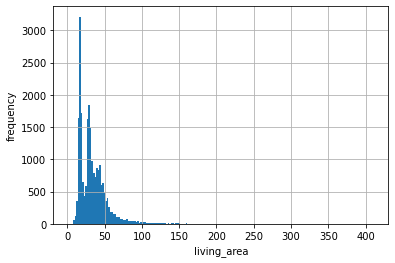

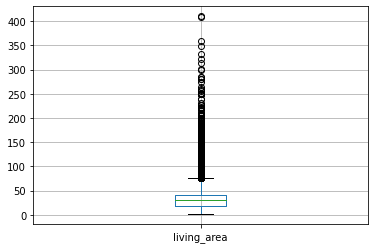

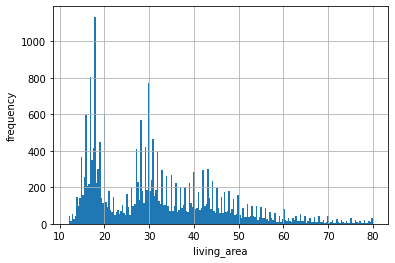

count    22787.000000
mean        31.909433
std         14.078052
min         12.000000
25%         19.000000
50%         30.000000
75%         41.000000
max         80.000000
Name: living_area, dtype: float64


In [34]:
print(data["living_area"].describe())#выведем описательную статистику исходного датафрейма
data["living_area"].hist(bins = 200 )#построим гистограмму 
plt.xlabel("living_area")#изменим название оси
plt.ylabel("frequency")#изменим название оси
plt.show()

#построим диаграмму размаха,дабы видеть теоретические границы нормальных значений и аномалий
data.boxplot("living_area");
plt.ylim()
plt.show()

#Как видно из результатов,основная часть всех объявлений находится в районе  от 12 до 80 м2.Для наглядного анализа,обрежем значения дальше этих значений.

living_area_data = data.query("living_area>=12 and living_area<=80")
living_area_data["living_area"].hist(bins = 200 )#построим гистограмму 
plt.xlabel("living_area")
plt.ylabel("frequency")
plt.show()
print(living_area_data["living_area"].describe())#выведем описательную статистику нового датафрейма

Вывод:Как видно из диаграммы размаха,значения меньше 12 м2(как минимальная жилая площадь для квартиры-студии,согласно информации из интернета.) и больше 80 можно отсеять.Как видно из результатов,основные пики значений припадают на квартиры стандартной площади,имеющие 1,2 и 3 комнаты и имеют жилую площадь порядка 18,30 и 40 м2 или около этих значений.

4.1.3 Площадь кухни

count    23699.000000
mean        10.491431
std          6.029020
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


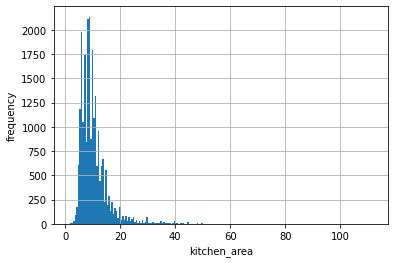

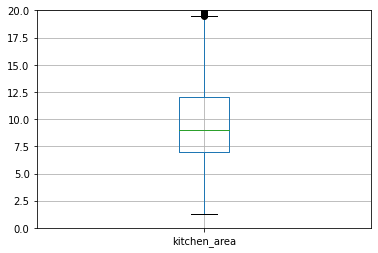

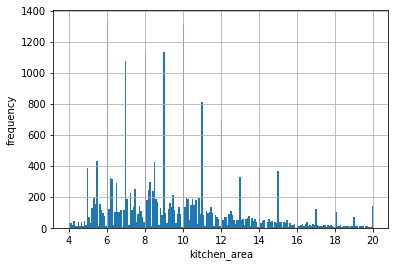

count    22451.000000
mean         9.528881
std          3.287414
min          4.000000
25%          7.000000
50%          9.000000
75%         11.200000
max         20.000000
Name: kitchen_area, dtype: float64


In [35]:
print(data["kitchen_area"].describe())#выведем описательную статистику исходного датафрейма
data["kitchen_area"].hist(bins = 200 )#построим гистограмму 
plt.xlabel("kitchen_area")
plt.ylabel("frequency")
plt.show()

#построим диаграмму размаха,дабы видеть теоретические границы нормальных значений и аномалий
data.boxplot("kitchen_area");
plt.ylim(0,20)
plt.show()


#Как видно из результатов,основная часть всех объявлений находится в районе  от 4 до 20 м2.Для наглядного анализа,обрежем значения дальше этих значений.
kitchen_area_data = data.query("kitchen_area>=4 and kitchen_area<=20")
kitchen_area_data["kitchen_area"].hist(bins = 200 )#построим гистограмму для 
plt.xlabel("kitchen_area")
plt.ylabel("frequency")
plt.show()
print(kitchen_area_data["kitchen_area"].describe())#выведем описательную статистику нового датафрейма

Вывод:Как видно из диаграммы размаха,значения меньше 4 м2(как минимальная  площадь кухни для квартиры-студии,согласно информации из интернета.) и больше 20 можно отсеять.Как видно из результатов,основные пики значений припадают на квартиры стандартных площадей и типажей,то есть,основные пики по тем площадям кухонь,которым соответсвуют квартиры из пунктов 4.1.1 и 4.1.2

4.1.4 Цена объекта

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


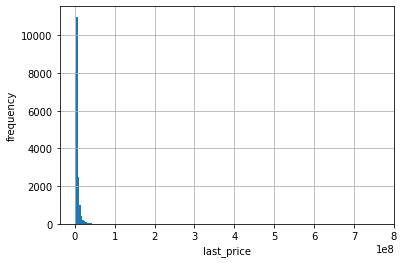

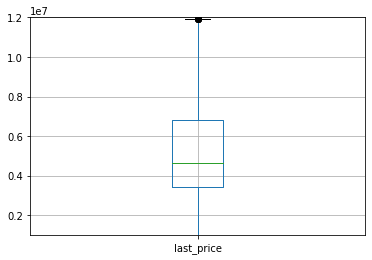

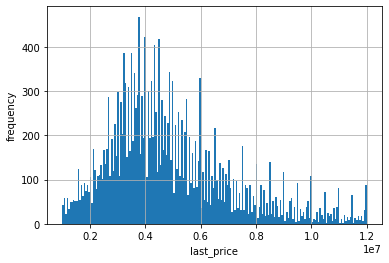

count    2.153300e+04
mean     4.922259e+06
std      2.245826e+06
min      1.000000e+06
25%      3.350000e+06
50%      4.450000e+06
75%      6.025000e+06
max      1.200000e+07
Name: last_price, dtype: float64


In [36]:
print(data["last_price"].describe())#выведем описательную статистику исходного датафрейма
data["last_price"].hist(bins = 200 )#построим гистограмму исходного датафрейма
plt.xlabel("last_price")
plt.ylabel("frequency")
plt.show()

#построим диаграмму размаха,дабы видеть теоретические границы нормальных значений и аномалий
data.boxplot("last_price");
plt.ylim(1000000,12000000)
plt.show()


#Как видно из результатов,основная часть всех объявлений находится в районе  от 0.1000+07 рублей до 1.200000e+07 рублей.Для наглядного анализа,обрежем значения дальше этих значений.
last_price_data = data.query("last_price>=1000000 and last_price<=12000000")
last_price_data["last_price"].hist(bins = 200 )#построим гистограмму нового датафрейма
plt.xlabel("last_price")
plt.ylabel("frequency")
plt.show()
print(last_price_data["last_price"].describe())#выведем описательную статистику нового датафрейма



Вывод:как видно из результатов,основные пики на графике имеют значения,+/- соотвествующие ценам популярных типов квартир:одно-,двух- и трехкомнатных квартир в хрущевках и панельках старых застроек.

4.1.5 Высота потолков

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


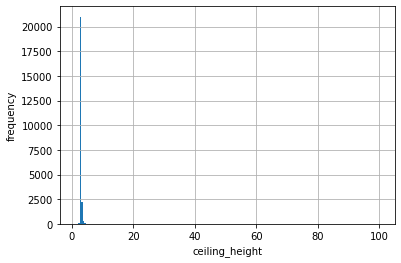

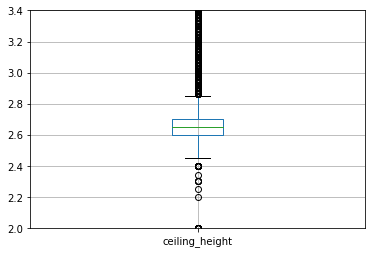

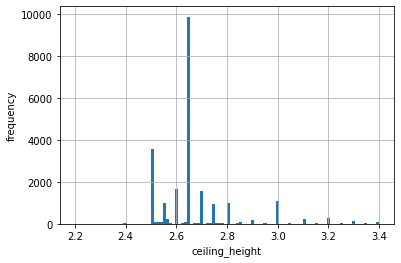

count    23247.000000
mean         2.677955
std          0.163479
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.400000
Name: ceiling_height, dtype: float64


In [37]:
print(data["ceiling_height"].describe())
data["ceiling_height"].hist(bins = 200 )#построим гистограмму для 
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()

data.boxplot("ceiling_height");
plt.ylim(2,3.4)  #2.1 и 3.4
plt.show()
#Как видно из результатов,в массиве имеются значения больше 20 м.Можно предположить,что эти значения вызваны ошибками.Чтобы избавиться от таких значений,поделим значения больше 10 на 10. 
data.loc[data["ceiling_height"]//10>1,"ceiling_height"] = data["ceiling_height"]/10
#Как видно из результатов,основная часть всех объявлений находится в районе  от 2.1 до 3.4 м.Для наглядного анализа,обрежем значения дальше этих значений.

ceiling_height_data = data.query("ceiling_height>=2.1 and ceiling_height<=3.4")
ceiling_height_data["ceiling_height"].hist(bins = 100 )#построим гистограмму для 
plt.xlabel("ceiling_height")
plt.ylabel("frequency")
plt.show()
print(ceiling_height_data["ceiling_height"].describe())#выведем описательную статистику нового датафрейма

Вывод:как видно из результатов,большая часть значений имеет высоту 2.65,что,скорее всего,является неким нормативным значением,и,определенно,это значение соответствует высоте потолка в квартирах типовых видов,где высота общая как для одна-,двух- и трехкомнатых квартир.

4.1.6 Тип этажа квартиры («первый», «последний», «другой»)

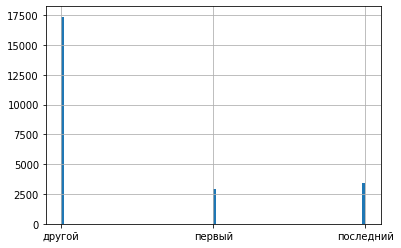

In [38]:
data["floor_type"].hist(bins = 100);

Вывод:как видно из результатов,большую часть объявления состоявляют квартиры из типа "другой"

4.1.7 Общее количество этажей в доме

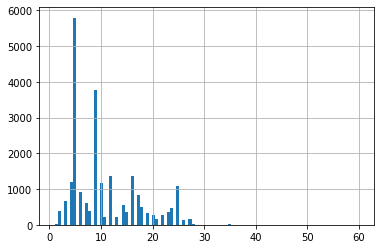

In [39]:
data["floors_total"].hist(bins = 100);

Вывод:как видно из результатов,большую часть объявления состоявляют квартиры из домов стандратной серии,то есть,пятиэтажные "хрущевки" и девятиэтажные "панельки".

4.1.8 Расстояние до центра города в метрах

count    23699.000000
mean     17396.589097
std       9613.401121
min        181.000000
25%      10927.000000
50%      14951.000000
75%      28806.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64


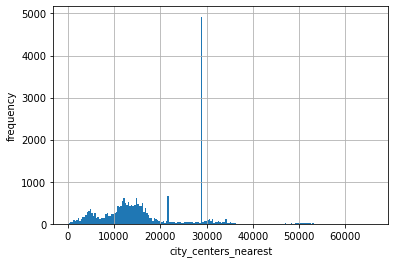

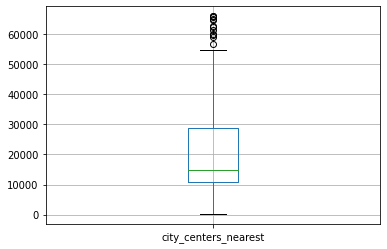

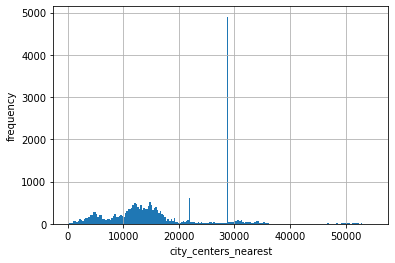

count    23687.000000
mean     17373.741630
std       9561.843185
min        181.000000
25%      10917.000000
50%      14950.000000
75%      28806.500000
max      54926.000000
Name: city_centers_nearest, dtype: float64


In [40]:
print(data["city_centers_nearest"].describe())
data["city_centers_nearest"].hist(bins = 200 )#построим гистограмму для 
plt.xlabel("city_centers_nearest")
plt.ylabel("frequency")
plt.show()

data.boxplot("city_centers_nearest");
plt.ylim()
plt.show()


#Как видно из результатов,основная часть всех объявлений находится в районе  от 0 до 55000 м.Для наглядного анализа,обрежем значения дальше этих значений.

ceiling_height_data = data.query("city_centers_nearest>=0 and city_centers_nearest<=55000")
ceiling_height_data["city_centers_nearest"].hist(bins = 200 )#построим гистограмму для 
plt.xlabel("city_centers_nearest")
plt.ylabel("frequency")
plt.show()
print(ceiling_height_data["city_centers_nearest"].describe())#выведем описательную статистику нового датафрейма

Вывод:во время предобработки данных,пропущенные значения были заменены на медиану расстояний до центра города Санкт-Петербурга среди объявлений,находящимися за его пределами.Как видно по гистограмме,самый большой пик является именно этим медианным значением,что говорит о достаточно большое количестве объявлений за пределами города.Если посмотреть на значения непосредственно в городе,то можно заметить,что больше объявлений находится на достаточно удалении от центра города(на периферии).На небольшом удалении от центра города объявление в разы меньше.

4.1.9 Расстояние до ближайшего парка

count    23699.000000
mean       167.315499
std        306.709997
min          0.000000
25%          0.000000
50%          0.000000
75%        301.000000
max       3190.000000
Name: parks_nearest, dtype: float64


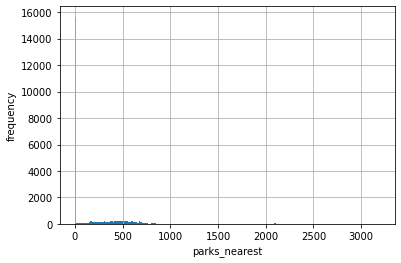

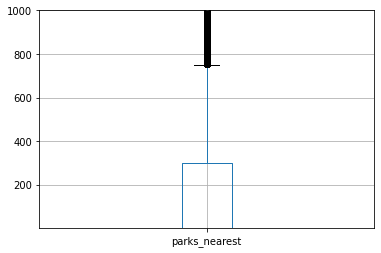

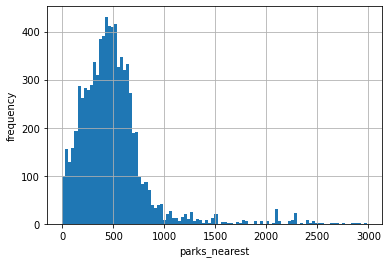

count    8075.000000
mean      489.505015
std       337.380019
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      2984.000000
Name: parks_nearest, dtype: float64


In [41]:
#data.hist("parks_nearest",bins = 100)

print(data["parks_nearest"].describe())
data["parks_nearest"].hist(bins = 200 )#построим гистограмму для 
plt.xlabel("parks_nearest")
plt.ylabel("frequency")
plt.show()

data.boxplot("parks_nearest");
plt.ylim(1,1000)
plt.show()


#Как видно из результатов, часть всех объявлений находится в районе  от 1 до 3000 м.Для наглядного анализа,обрежем значения дальше этих значений.

parks_nearest_data = data.query("parks_nearest>=1 and parks_nearest<=3000 ")
parks_nearest_data["parks_nearest"].hist(bins = 100 )#построим гистограмму для 
plt.xlabel("parks_nearest")
plt.ylabel("frequency")
plt.show()
print(parks_nearest_data["parks_nearest"].describe())#выведем описательную статистику нового датафрейма




Вывод:во время предобработки данных,пропущенные значения были заменены на 0,так как все пропуски этого столбца также имели пропуски в столбце "количество парков в радиусе 3х км".Как видно из результатов,это внесло большую погрешность в правильном понимании значений гистограммы,если брать во внимания все значения,ибо ,по логике,чем меньше расстояние,чем ближе парк,а в нашем случае значение 0 означает не то,что парк  прямо под окнами кваритиры,а то ,что парка нет вообще.Исходя из этого,обрежем значения нового датафрейма ниже 1.Если анализировать то что есть,то выходит.что из всего массива данных в 23700 объявлений ,расстояние до парка есть только у 7585 квартир.Можно прийти к выводу,что  часть всех этих пропусков будут составлять  квартиры из деревень и посёлков ,так как в них нет парков,а другую часть города,где количество парков невелико и многи квартиры могут не иметь доступа к ним.С другой стороны,многие городские квартиры могут иметь доступ к 1 парку в радиусе 3 км,но ,во-первых,могут не знать этого,а,во-вторых,хозяева могут это учитывать как несущественных факт,ибо 3 км по городу,это достаточно много.

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Прокомментируй пожалуйста все визуализации данного раздела в ячейках Markdown.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">


Исправлено.</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Гистограммы построены и прокомментированы правильно.

4.2 Изучим, как быстро продавались квартиры

count    23699.000000
mean       185.687497
std        233.362824
min         -1.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1617.000000
Name: days_exposition, dtype: float64


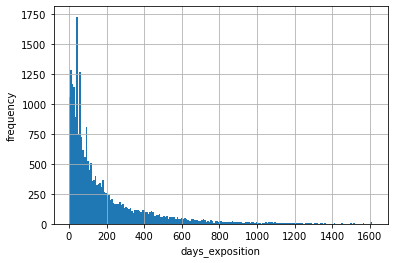

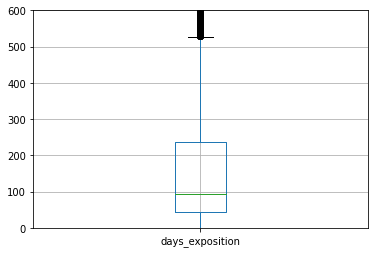

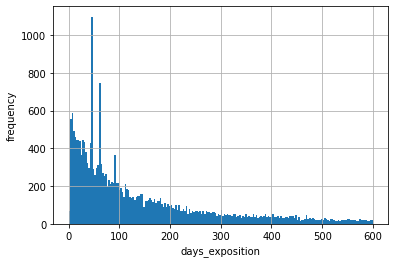

count    22192.000000
mean       139.092871
std        138.850283
min          0.000000
25%         40.000000
50%         86.000000
75%        197.000000
max        600.000000
Name: days_exposition, dtype: float64


In [42]:
print(data["days_exposition"].describe())
data["days_exposition"].hist(bins = 200 )#построим гистограмму для 
plt.xlabel("days_exposition")
plt.ylabel("frequency")
plt.show()

data.boxplot("days_exposition");
plt.ylim(0,600)  #2.3 и 3.1
plt.show()


#Как видно из результатов,основная часть всех объявлений находится в районе  от 0 до 600 дней .Для наглядного анализа,обрежем значения дальше этих значений.

days_exposition_data = data.query("days_exposition>=0 and days_exposition<=600")
days_exposition_data["days_exposition"].hist(bins = 200 )#построим гистограмму для 
plt.xlabel("days_exposition")
plt.ylabel("frequency")
plt.show()
print(days_exposition_data["days_exposition"].describe())#выведем числовое описание для колонки



Вывод:как видно из результатов,медиана находится в районе 86 дней.Как видно из описательных данных,минимальное значение равно -1.Уберем  все значения меньше либо равным 1.При анализе этих данных нужно учитывать,что некоторые объявления могут быть сняты с сайта не потому что квартиры были проданы ,а потому что хозяин передумал и удалил объявление.Можно предположить,что все что левее самого высокого пика,то есть около 1.5 месяца,можно считать быстрыми продажами.Все,что находится в продаже больше 200 дней,можно считать  долгими.Возможные пики могут быть по нескольким причинам,например:постройка нового жилого комплекса,где квартиры выставили на продажу,некое политическое событие,сильно повлиявшее на рынок,ошибки сайта и т.д.Однозначно сказать,из-за чего образованы эти пики, нельзя.
P.S. Дабы убедиться,что эти пики не являются ошибками при заполнении пропусков,в пункте 2.20 был построена гистограмм до заполнения и на ней все также имеются эти пики.

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ✔️</b>

Если почитать [правила публикации объявлений](https://yandex.ru/support/realty/owner/home/add-ads-housing.html) такие ограничения (45, 60 и 90 дней) по срокам размещения действовали до недавнего времени.

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>В целом все так, но стоит поподробнее рассмотреть диапазон, скажем, от 0 до 200 дней, возможно обнаружатся интересные факты.</div>

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">


Изменено.</div>

4.3 Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.Проверим поочередно зависимость со следующими факторами.

4.3.1 Общая площадь:

0.6820860003005751

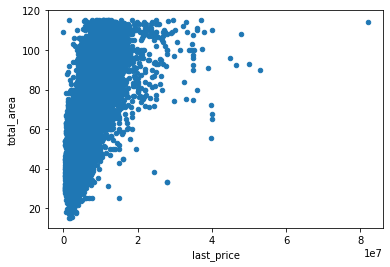

In [43]:
total_area_data.plot(x='last_price', y='total_area', kind='scatter')#Построим диаграмму зависимости
total_area_data['total_area'].corr(total_area_data["last_price"])#Посчитаем коэффициент корреляции Пирсона

Вывод:как видно из результатов,коэффициент корреляции имеет достаточно большое значение,что говорит о том,что цена квартиры явно зависит от её общей площади.

4.3.2 Жилая площадь:

0.5099483199911329

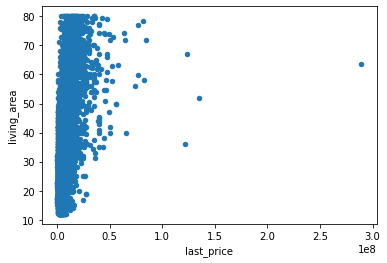

In [44]:
living_area_data.plot(x='last_price', y='living_area', kind='scatter')#Построим диаграмму зависимости
living_area_data['living_area'].corr(living_area_data["last_price"])#Посчитаем коэффициент корреляции Пирсона

Вывод:как видно из результатов,коэффициент корреляции имеет умеренное значение,что говорит о том,что цена квартиры  зависит от её жилой площади.

4.3.3 Площадь кухни:

0.46404226972875046

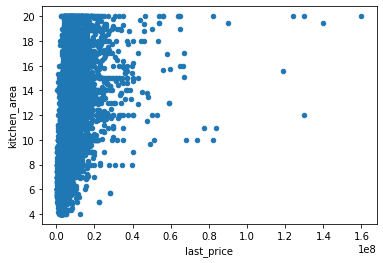

In [45]:
kitchen_area_data.plot(x='last_price', y='kitchen_area', kind='scatter')#Построим диаграмму зависимости
kitchen_area_data['kitchen_area'].corr(kitchen_area_data["last_price"])#Посчитаем коэффициент корреляции Пирсона

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b></h5>

<s>Здесь код падает с ошибкой, поправь пожалуйста, чтобы я смог полностью проверить твой проект.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">
Код исправлен.</div>

Вывод:как видно из результатов,коэффициент корреляции имеет умеренное значение,что говорит о том,что цена квартиры  зависит от площади кухни.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

<h5><b>🏁 Общий комментарий ревьюера</b></h5>


Критические замечания я добавил в меню **Contents** слева.

Также, постарайся отработать желтые комментарии.

Буду ждать твой доработанный проект. ⌛️

4.3.4 Количество комнат:

        last_price
rooms             
0        2700000.0
1        3600000.0
2        4770169.0
3        6200000.0
4        9000000.0
5       14000000.0
6       19000000.0
7       24900000.0
8       23095000.0
9       23750000.0
10      23000000.0
11      25250000.0
12     420000000.0
14      26829500.0
15      65000000.0
16      28500000.0
19      32250000.0


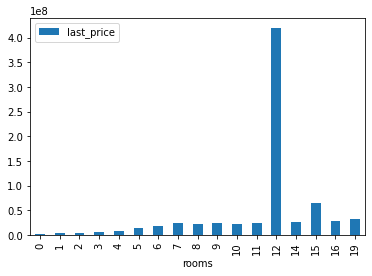

In [46]:
#data.plot(x='last_price', y='rooms', kind='scatter')#Построим диаграмму зависимости
#data['rooms'].corr(data["last_price"])#Посчитаем коэффициент корреляции Пирсона
test_rooms = data.pivot_table(index = "rooms" ,values ="last_price" ,aggfunc = "median")#создадим сводную таблицу 
print(test_rooms)#Выведем медианную цену по кол-ву комнат
test_rooms.plot(kind='bar');#создадим столбчатую диаграмму

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера 3 ⚠️</b>
    
Здесь можно ограничить количество комнат до 6, например, сильный выброс на 12 комнатах не дает увидить тренд.

Вывод(изменено):можно заметить,что результаты нестандартны.При детальном рассмотрении видно,что чем больше комнат в квартире,тем,соответственно больше площадь и больше цена.В глаза сразу бросается пик на значении 12 и низкие значения после него.Это может быть выброс.

4.3.5 Этаж, на котором расположена квартира (первый, последний, другой):

       last_price
floor            
1       3900000.0
2       4490000.0
3       4630000.0
4       4700000.0
5       4400000.0
6       5100000.0
7       4950000.0
8       4800000.0
9       4690000.0
10      5050000.0
11      5100000.0
12      5170000.0
13      5300000.0
14      5035000.0
15      5000000.0
16      5200140.0
17      4900000.0
18      5400000.0
19      5045000.0
20      4950000.0
21      5250000.0
22      5350000.0
23      5185000.0
24      5150000.0
25      4775000.0
26      4040000.0
27      4494000.0
28      5990000.0
29      9200000.0
30     10150000.0
31      5700000.0
32      9900000.0
33      9900000.0


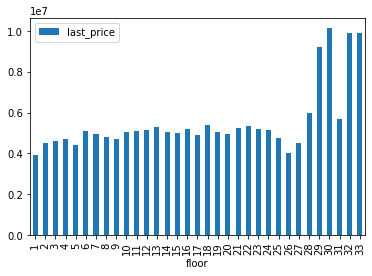

In [47]:
#data.plot(x='last_price', y='floor', kind='scatter')#Построим диаграмму зависимости
#data['floor'].corr(data["last_price"])#Посчитаем коэффициент корреляции Пирсона
test_floor = data.pivot_table(index = "floor" ,values ="last_price" ,aggfunc = "median")#создадим сводную таблицу 
print(test_floor)#Выведем медианную цену по этажам
test_floor.plot(kind='bar');#создадим столбчатую диаграмму

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера 3 ⚠️</b>

Здесь мы смотрим не количество этажей, а тип этажности: "первый, последний, другой"

Вывод(изменено):как видно из результатов,в среднем,цена не зависит от этажа в домах стандартной высоты.В случае же высотных современных домов,цены на квартиры на верхних этажах почти в разы выше.Это может быть обусловлено новым типом дома или тем,что последний квартиры могут быть двухэтажными,иметь большую площадь или иметь личную террасу.

4.3.6 Даты размещения (день недели, месяц, год):

4.3.6.1 Зависимость от дня недели:

                    last_price
day_of_publication            
0                    4650000.0
1                    4730000.0
2                    4700000.0
3                    4650000.0
4                    4585000.0
5                    4555000.0
6                    4550000.0


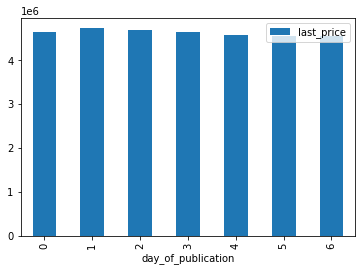

In [48]:
#data.plot(x='last_price', y='day_of_publication', kind='scatter')#Построим диаграмму зависимости
#data['day_of_publication'].corr(data["last_price"])#Посчитаем коэффициент корреляции Пирсона
test_day = data.pivot_table(index = "day_of_publication" ,values ="last_price" ,aggfunc = "median")#создадим сводную таблицу 
print(test_day)
test_day.plot(kind='bar');#создадим столбчатую диаграмму

Вывод:как видно из результатов, цена не зависит от дня недели.

4.3.6.2 Зависимость от месяца  публикации :

In [1]:
#data.plot(x='last_price', y='month_of_publication', kind='scatter')#Построим диаграмму зависимости
#data['month_of_publication'].corr(data["last_price"])#Посчитаем коэффициент корреляции Пирсона
test_month = data.pivot_table(index = "month_of_publication" ,values ="last_price" ,aggfunc = "median")#создадим сводную таблицу 
print(test_month)
test_month.plot(kind='bar');#создадим столбчатую диаграмму


NameError: name 'data' is not defined

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера 3 ⚠️</b>

Кажется, на графике опять дни недели...

Вывод:как видно из результатов, цена не зависит от месяца публикации

4.3.6.3 Зависимость от года  публикации :

                     last_price
year_of_publication            
2014                  7700000.0
2015                  5350000.0
2016                  4550000.0
2017                  4500000.0
2018                  4550000.0
2019                  5050000.0


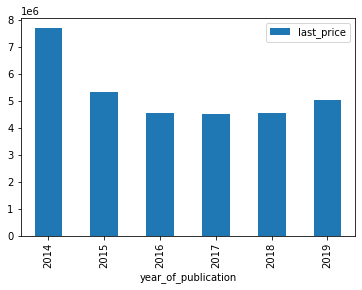

In [50]:
#data.plot(x='last_price', y='year_of_publication', kind='scatter')#Построим диаграмму зависимости 
#data['year_of_publication'].corr(data["last_price"])#Посчитаем коэффициент корреляции Пирсона 
test_year = data.pivot_table(index = "year_of_publication" ,values ="last_price" ,aggfunc = "median")#создадим сводную таблицу 
print(test_year)
test_year.plot(kind='bar');#создадим столбчатую диаграмму

Вывод:как видно из результатов, в 2014 году цены на квартиры были выше.Скорее всего,в тот год была нестабильная политическая или финансовая ситуация в стране и как итог,изменение стоимости недвижимости.

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера 2 ❌</b></h5>
    
<s>Для категориальных признаков (количество комнат, тип этажа, день, месяц и год размещения) диаграмма рассеяния и коэффициент корреляции не будут наглядны и показательны. Стоит сравнить медианные цены объектов, сгруппированных по категориям на столбчатой диаграмме.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">
Код исправлен.</div>

4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [51]:
#list_of_popular = (data["locality_name"].value_counts()[0:10]).index#Отсортируем значения по частоте их встречи и выберем 10 частых 
#data_popular = data.query("locality_name in @list_of_popular")#Отсортируем все значение data ,если он встречаются в list_of_popular
#data_popular["mean_price"] = data_popular["last_price"]/data_popular["total_area"]#Создадим новый столбец со средней ценой одного квадратного метра
#mean_pivot_table = data_popular.pivot_table(index = "locality_name",values = "mean_price",aggfunc = "mean" )
#print(mean_pivot_table.sort_values("mean_price"))

#Сформируем сводную таблицу с 10 насёленными пунктами с самым большим кол-вом объявлений 
list_of_popular = data.pivot_table(index ="locality_name",values = ["total_area","last_price"],aggfunc = {"total_area":"count","last_price":lambda x:  (data.loc[x.index,"last_price"]/data.loc[x.index,"total_area"]).mean()}).sort_values("total_area",ascending = False) 
list_of_popular = list_of_popular.rename(columns={"last_price":"mean_price_per_square_meter","total_area":"count"})
print(list_of_popular.head(10))



                   mean_price_per_square_meter  count
locality_name                                        
Санкт-Петербург                  114849.008794  15721
посёлок Мурино                    85681.762601    556
посёлок Шушары                    78677.364217    440
Всеволожск                        68654.473986    398
Пушкин                           103125.819291    369
Колпино                           75424.579098    338
посёлок Парголово                 90175.913458    327
Гатчина                           68746.146763    307
деревня Кудрово                   92473.547576    299
Выборг                            58141.909153    237


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера 3 ✔️</b>

Сводная таблица правильная.

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера 2 ❌</b></h5>
    
<s>Давай соберем все расчеты в одну сводную таблицу со столбцами:
- населенный пункт
- количество объявлений
- средняя цена кв метра

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">
Изменено.</div>

Вывод:Как видно из результата,самая высокая цена за квадратный метр в Санкт-Петербурге(так как он является и городом областного значения,и своего рода культурной столицей),а самый низкий в Выборге(это можно объяснить тем,что он являетя город районного значения,находящемся на большом расстоянии от Санкт-Петербурга).Примечателно то,что в некоторых населённых вида деревня или посёлок цена выше,чем в том же самом Выборге.Это связано с расстоянием до Санкт-Петербурга.

4.5 Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра.

15721


-0.7095678409567697

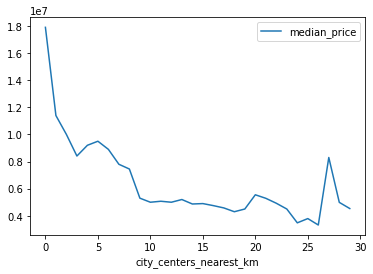

In [52]:
saint_petersburg_data = data.query("locality_name == 'Санкт-Петербург' ")#Выделим из датафрейма объявления только из Санкт-Петербурга
print(len(saint_petersburg_data))#общее кол-во квартир из Санкт-Петербурга
saint_petersburg_pivot_table = saint_petersburg_data.pivot_table(index ="city_centers_nearest_km",values = "last_price",aggfunc = ["median","count"]  )#Создадим сводную таблицу с градациями по расстоянию до центра города
saint_petersburg_pivot_table.columns = ["median_price","count"]#Изменим название столбцов дабы избежать многоуровневой индексации
saint_petersburg_pivot_data = saint_petersburg_pivot_table.reset_index()#Преобразуме сводную таблицу в датафрейм ,дабы появились порядковые индексы
saint_petersburg_pivot_data.plot(x="city_centers_nearest_km" , y='median_price')#Создадим диаграмму рассеивания
saint_petersburg_pivot_data["city_centers_nearest_km"].corr(saint_petersburg_pivot_data["median_price"])#Определим коэффициент корреляции Пирсона






<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера 2 ⚠️</b>

<s>Здесь бы больше подошел линейный график.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<div class="alert-info" style="padding: 20px; border-radius: 10px">
Код исправлен.</div>

Вывод.
Как видно из получившихся результатов,коэффициент корреляции Пирсона имеет значение -0.71,что является достаточно большим значением.Это означает,что расстояние от центра города обратно пропорционально средней стоимостью квартиры  и данную мысль можно перефразировать:"Чем ближе к центру города,тем дороже недвижимость"

### Напишите общий вывод

Вывод:Во время исследовательского анализа данных были обработаны и изучены объявления по продаже квартир в пределах Ленинградской области.На этапе первичного обзора данных было замечено,что подавляющую часть пропусков составляли данные,заполененные компьютером и нестандартные для заполнения булевые данные,например "свободная планировка" или "апартаменты".

На этапе предобработки,где это возможно,заполнены пропуски медианными или сходными значениями,в некоторых столбцах изменены названия для соответствия общепринятым стандартам,измененые типы данных для более логичного и корректоного дальнейшего использования.Были добавленые новые столбцы для более практичного использования такие данных,как расстояние до центра города и датой публикации.

На этапе исследовательского анализа данных было замечено,что подавляющую  часть всех объявлений по продаже квартир составляют квартиры типичных планов застроек:одна-,двух- и трехкомнатные квартиры с высотой потолка 2.65 м,в домах с 4,5 или 9 этажами.Многие квартиры не имеют доступа к паркам и водоёмам.Большая часть объявлений находится в Санкт-Петербурге.Цена квартиры в большей степени зависит ее общей площади и не зависит от дня и месяца  публикации.В зависимости от политической и экономическое ситуации в стране  может меняться средняя цена на недвижимость ,например,2014 год.Цена квартиры не зависит от этажа,за исключением новых современных домов,где на последних этажах размещаются многоэтажные квартиры или квартиры с террасами.Самая большая цена за 1 м2 в Санкт-Петербурге,где сама  зависит от удаленности от центра.

<div class="alert-warning" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера 2 ⚠️</b>

<s>Итоговый вывод стоит разбить на смысловые абзацы для легкости чтения.

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<h5><b>🏁 Общий комментарий ревьюера 2: </b></h5>

Спасибо, что дорабатываешь проект. У меня осталась пара замечаний:
    
- анализ влияния категориальных признаков на цену
- сводная таблица цен в топ-10 населенных пунктов по количеству объявлений
    

Уверен, ты быстро все поправишь. ⌛️</div>

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
<h5><b>🏁 Общий комментарий ревьюера 3: </b></h5>

Спасибо, что учел мои замечания и доработал проект. Критических замечаний больше нет, отдельные моменты дополнительно прокомментировал.
    
Успехов в дальнейшем обучении! 🏆